# Visualizing Real Data

So - let's put these two concepts together! Let's use plotting functions so that we don't have to look at these big data frames by hand, but can examine them visually to look for interesting patterns.

First let's load in the "penguins" data set (<https://github.com/allisonhorst/palmerpenguins>)

This is a dataset which is useful for understanding plotting and manipulating data. 

It's data collected by Dr. Kristen Gorman and the Palmer Station, Antarctica on penguin ecology.  The dataset contains information for phenotypes of 344 penguins, with 3 different penguin species.

We've provided this data as Excel file - it can be loaded with pandas.

In [1]:
import pandas as pd

In [2]:
!ls

plotting.ipynb	tidying.ipynb  visualizing.ipynb


In [3]:
penguin=pd.read_excel('../data/penguin.xlsx')
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's start by just plotting - for example - the length of their flippers vs their body mass.  How would we do that from this dataset?  We'll use `matplotlib`, but with the additional interface of `seaborn` <https://seaborn.pydata.org/index.html>. Seaborn is a nice data package for easily visualizing data based on _top_ of matplotlib, just making it a bit easier to make plots.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

So we want to plot the `flipper_length_mm` column vs the `body_mass_g` column.  We can do this using the `relplot` function in seaborn <https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot> 

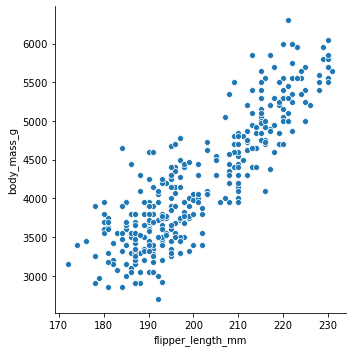

In [5]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g")

So this is pretty good, we can see already that there is a roughly linear relationship between flipper length and body mass.  But how this look if we stratify or compare the species?  Is there a way we can look at that data simultaneously? Let's color code the points according to their species like so using `hue`:

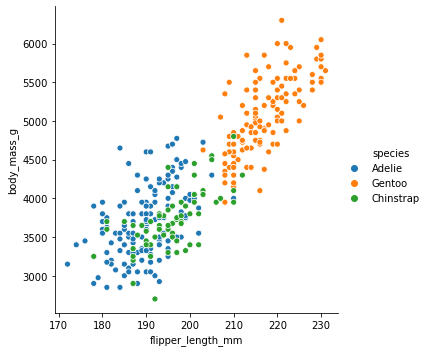

In [7]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="species")

Pretty nice!  We could also make the markers different shapes by setting `style`

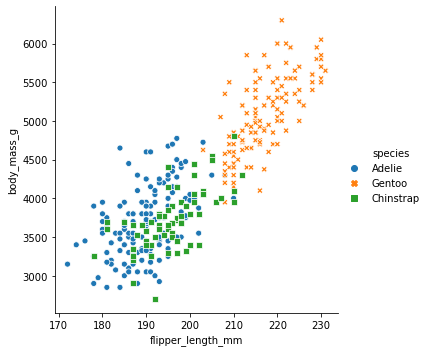

In [8]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="species", style="species")

Ok - but some of the points are basically on top of each other, making it hard to see.  You can make them partially transparent by setting `alpha` which is the level of transparency - making sure we can see the points.

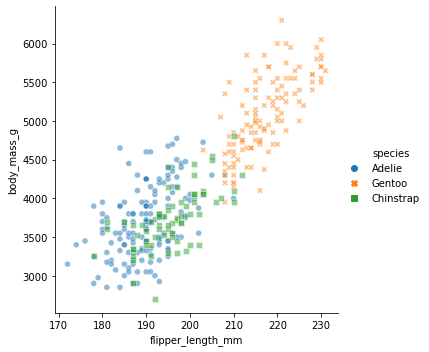

In [9]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="species", style="species", alpha=.5)

But what if we have a more quantitative third variable - for example bill length. When you set hue to this it tries to automatically scale the point color to the different bill lengths.

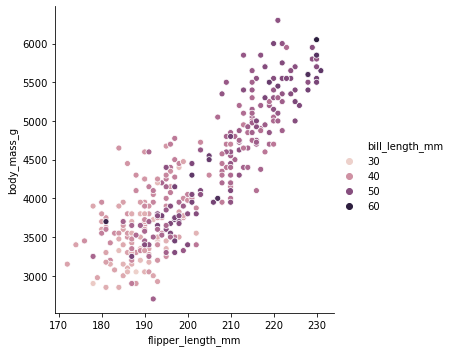

In [13]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="bill_length_mm")

Or we can actually make the points change size, according to this variable.

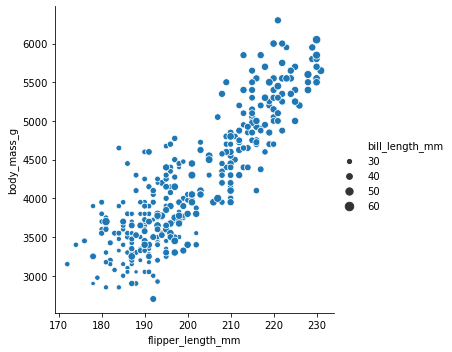

In [14]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", size="bill_length_mm")

What if we want to layer the species information on top of the rest of this?  We can try:

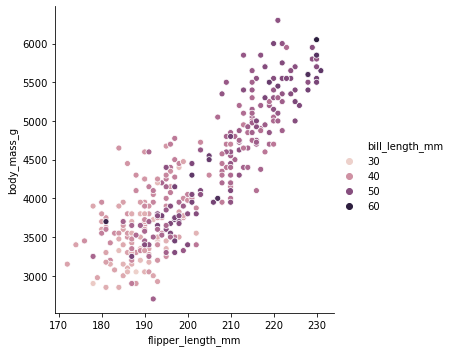

In [13]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="bill_length_mm")

But the problem is that the plot becomes too crowded to really understand the information.  Instead, we can **facet** the plots, we can do this by either setting `col`:

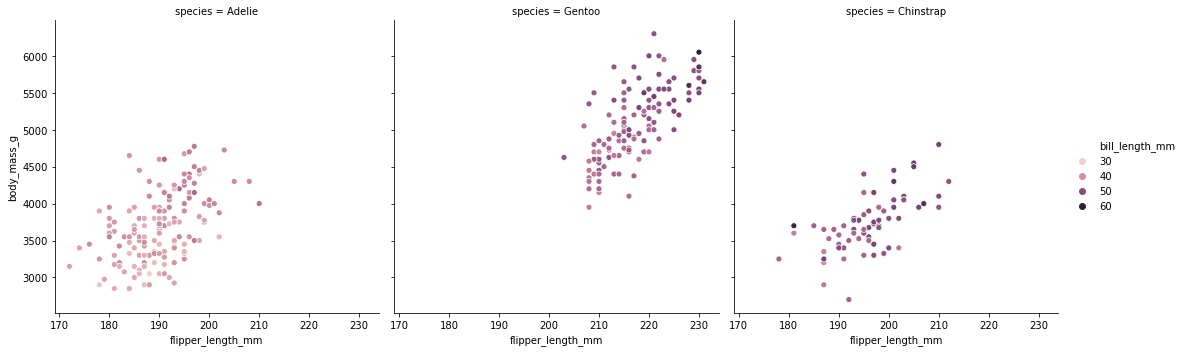

In [16]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="bill_length_mm", col="species")

Or `row`

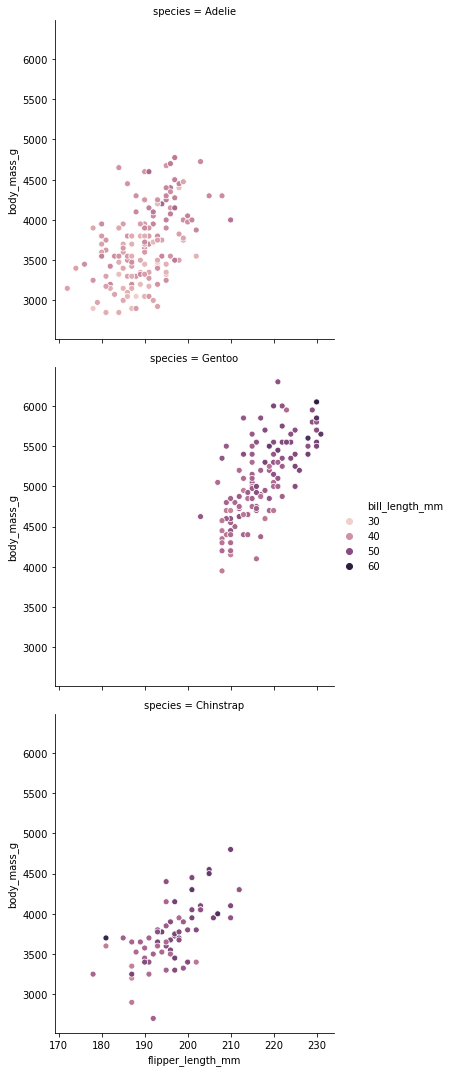

In [17]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="bill_length_mm", row="species")

We can add `col_wrap` to say how many columns of plots to make - allowing the plot to take up less space:

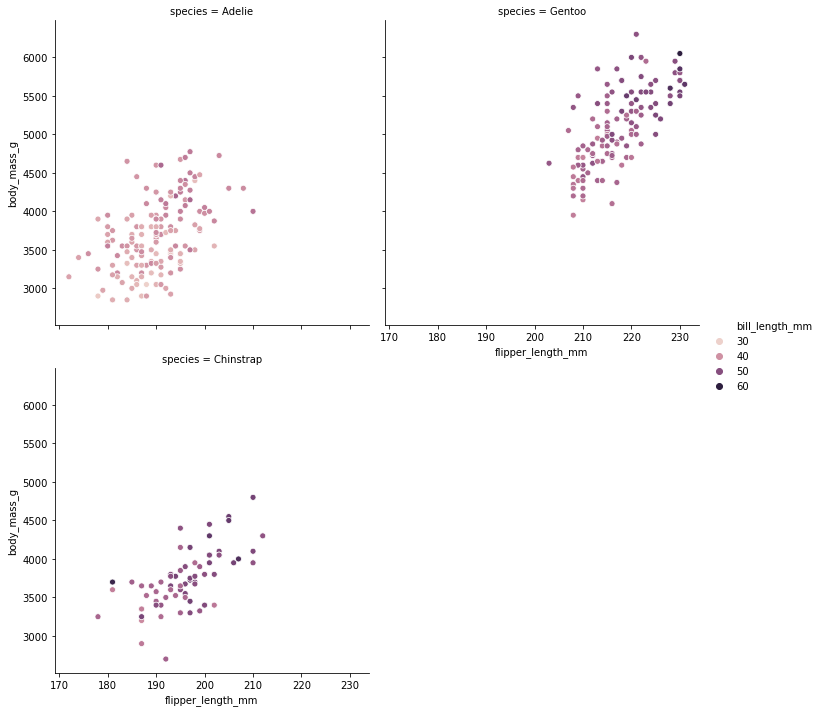

In [19]:
sns.relplot(data=penguin, x="flipper_length_mm", y="body_mass_g", hue="bill_length_mm", col="species", col_wrap=2)

We can even just look at all the different pairs of the data automatically using `pairplot`

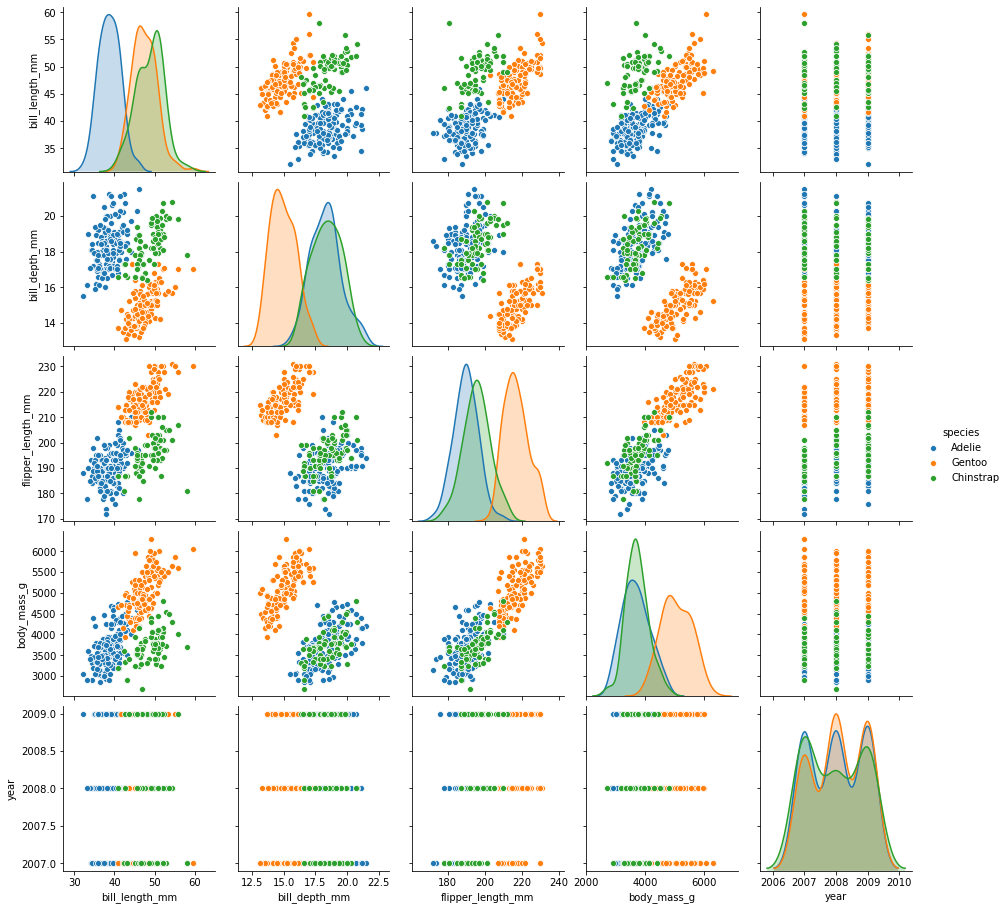

In [32]:
sns.pairplot(penguin, hue="species")

Ah - I don't really care about the year for this specific data, let's drop that column and replot:

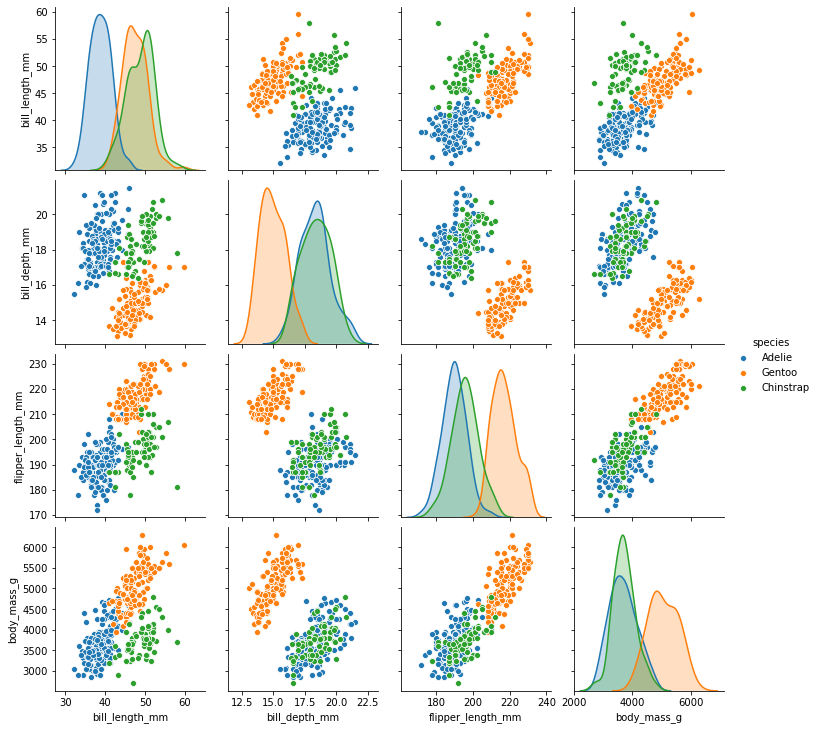

In [34]:
sns.pairplot(penguin.drop(columns="year"), hue="species")

What if we just want to compare the _distributions_ of, say, flipper length between the different species? Plotting the difference between **categorical** variables instead of quantitative variables can be done using `catplot`

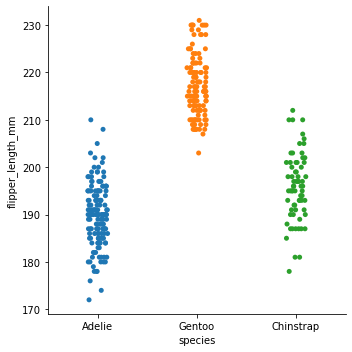

In [20]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm")

Again, some of the points are overlapping with each other, even with _jitter_ or x-separation for the points.  We can try to alleviate this with either alpha (as before):

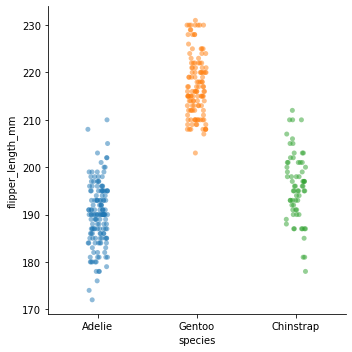

In [21]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", alpha=0.5)

Or we can use the `swarm` setting which tries to prevent overlapping

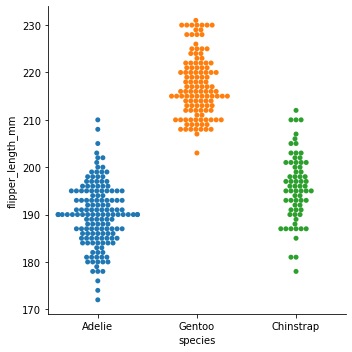

In [43]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", kind="swarm")

The color is a little extraneous here - we could use that color for something else - how about using it for the penguin sex?

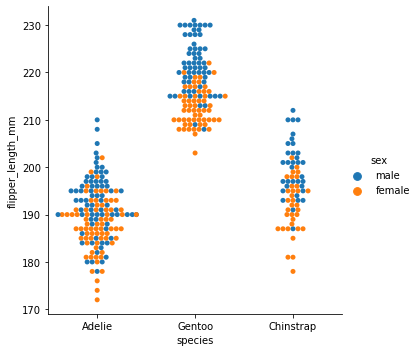

In [24]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", kind="swarm", hue="sex")

This has more information content - we can still see the differences in distribution between the species, but we can also see that the females have different flipper lengths than the males.   
We can also make the categorical axis the y-axis if we want instead:

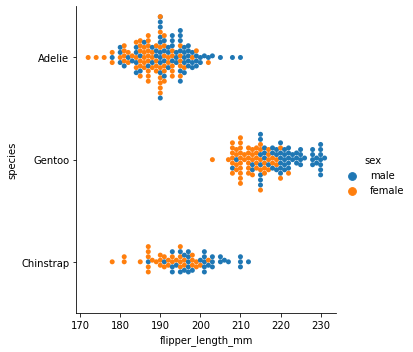

In [26]:
sns.catplot(data=penguin, x="flipper_length_mm", y="species", kind="swarm", hue="sex")

Plotting the points is informative, but we may want to instead make a boxplot to better represent the distribution.  Boxplots have a box which show the 25th percentile to the 75th percentile of the data, with the "whiskers" showing 1.5 X the interquartile. We can just set this with `kind="box"`

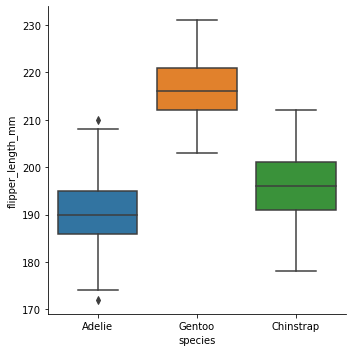

In [27]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", kind="box")

And what happens if we try to color code by sex here?

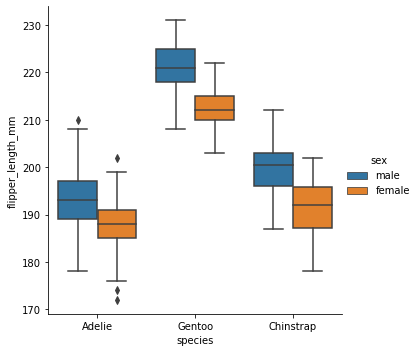

In [28]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", hue="sex", kind="box")

The boxes are automatically "dodged" or separated.  Here it becomes clear that male and female are pretty different in flipper length, and the different species are different as well.   Sometimes we might be interested in the distribution of the points, but still having the boxplot:

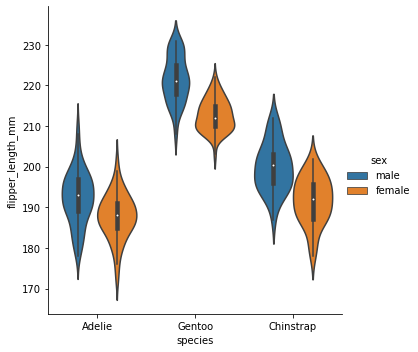

In [29]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", hue="sex", kind="violin")

But if what if we want the swarm plot _on top_ of the violin (instead of the box plot) - can do it like this:

/home/timp/miniconda3/envs/bcmb/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)


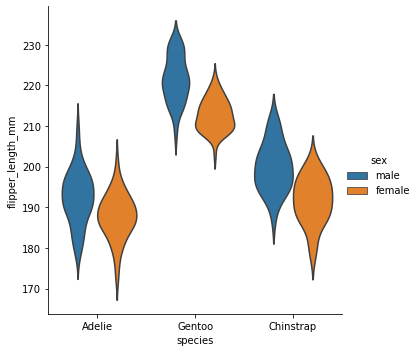

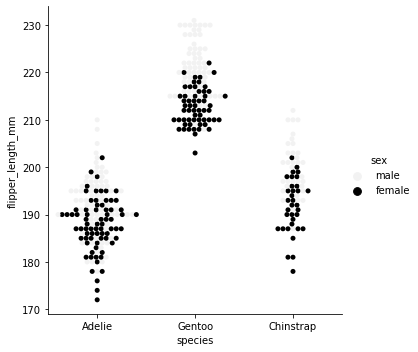

In [38]:
myplot=sns.catplot(data=penguin, x="species", y="flipper_length_mm", hue="sex", kind="violin", inner=None)
sns.catplot(data=penguin, x="species", y="flipper_length_mm", color="k", ax=myplot.ax, hue="sex", kind="swarm")

One nice option with violin plots is that we can "split" the violins if you have two levels to the color (hue) you are using:

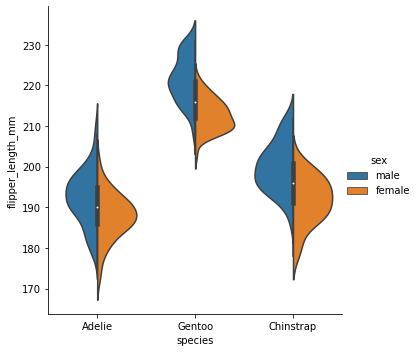

In [30]:
sns.catplot(data=penguin, x="species", y="flipper_length_mm", hue="sex", kind="violin", split=True)